<a href="https://colab.research.google.com/github/Sanjansrinivas/da-lab/blob/main/Updated_Breast_Cancer_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import cv2
import re
import difflib
import numpy as np
import tensorflow as tf

import seaborn as sns
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [5]:
img1 = cv2.imread(r'/content/drive/MyDrive/Datasets/training/Stage 2/5523712.png')
print(img1)

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [235 235 235]
  [236 236 236]
  [235 235 235]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [235 235 235]
  [233 233 233]
  [233 233 233]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [233 233 233]
  [232 232 232]
  [233 233 233]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [156 156 156]
  [151 151 151]
  [165 165 165]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [153 153 153]
  [155 155 155]
  [166 166 166]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [150 150 150]
  [156 156 156]
  [168 168 168]]]


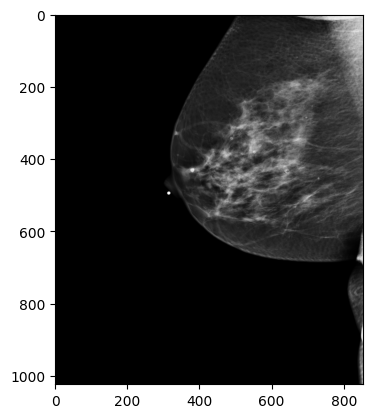

In [6]:
#previewing the image using open cv
plt.imshow(img1)

In [7]:
#evaluating the size of the image
print("the shape of the image ")
print(img1.shape)
#so we can see that the image has height=64 px , width=64 px , channel= 3
#so the image is an rgb image

the shape of the image 
(1024, 854, 3)


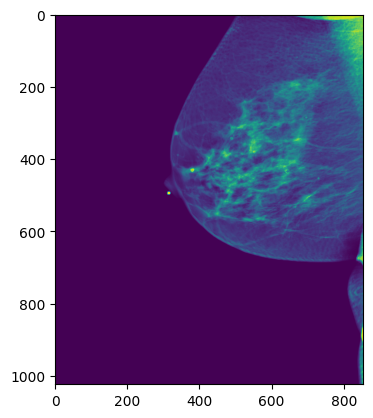

In [8]:
img_gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

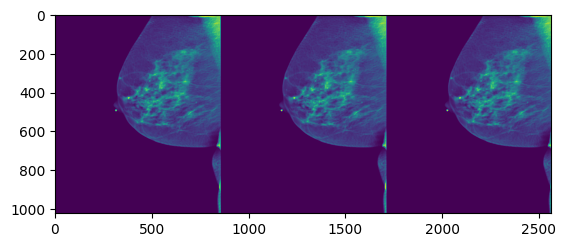

In [9]:
import numpy as np
imgblue=img1[:,:,0]
imggreen=img1[:,:,1]
imgred=img1[:,:,2]
new_image=np.hstack((imgblue,imggreen,imgred))
plt.imshow(new_image)

In [11]:
# Load the data
data_path = r"/content/drive/MyDrive/Datasets"
categories = sorted(os.listdir(os.path.join(data_path, "training")))
epochs_number = 14

def load_data(data_type):
    images = []
    labels = []
    for idx, category in enumerate(categories):
        category_path = os.path.join(data_path, data_type, category)
        for img_name in os.listdir(category_path):
            img = cv2.imread(os.path.join(category_path, img_name))
            img = cv2.resize(img, (128, 128))
            images.append(img)
            labels.append(idx)
    return np.array(images), np.array(labels)

X_train, y_train = load_data("training")
X_val, y_val = load_data("validation")

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(categories), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=epochs_number, validation_data=(X_val, y_val))

Epoch 1/14
59/59 [==============================] - 10s 49ms/step - loss: 4.0838 - accuracy: 0.2176 - val_loss: 1.5860 - val_accuracy: 0.2490
Epoch 2/14
59/59 [==============================] - 1s 21ms/step - loss: 1.5818 - accuracy: 0.2542 - val_loss: 1.5695 - val_accuracy: 0.2849
Epoch 3/14
59/59 [==============================] - 1s 21ms/step - loss: 1.5633 - accuracy: 0.2696 - val_loss: 1.5106 - val_accuracy: 0.3367
Epoch 4/14
59/59 [==============================] - 1s 19ms/step - loss: 1.5418 - accuracy: 0.2994 - val_loss: 1.4746 - val_accuracy: 0.3386
Epoch 5/14
59/59 [==============================] - 1s 19ms/step - loss: 1.4947 - accuracy: 0.3307 - val_loss: 1.4258 - val_accuracy: 0.4263
Epoch 6/14
59/59 [==============================] - 1s 20ms/step - loss: 1.4271 - accuracy: 0.3875 - val_loss: 1.3587 - val_accuracy: 0.4502
Epoch 7/14
59/59 [==============================] - 1s 19ms/step - loss: 1.3598 - accuracy: 0.4273 - val_loss: 1.2400 - val_accuracy: 0.5398
Epoch 8/14
5

In [14]:
# Extract accuracy from history
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Print model summary with accuracy
print(model.summary())
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [15]:
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)

# Get the predicted class indices (argmax of the predictions)
train_predicted_classes = train_predictions.argmax(axis=1)
val_predicted_classes = val_predictions.argmax(axis=1)

# Generate classification reports
train_report = classification_report(y_train, train_predicted_classes)
val_report = classification_report(y_val, val_predicted_classes)

# Print the classification reports
print("Training Classification Report:")
print(train_report)

print("\nValidation Classification Report:")
print(val_report)

16/16 [==============================] - 0s 5ms/step
Training Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       400
           1       0.86      0.88      0.87       283
           2       0.88      0.87      0.87       400
           3       0.93      0.85      0.89       401
           4       0.85      0.89      0.87       400

    accuracy                           0.87      1884
   macro avg       0.87      0.87      0.87      1884
weighted avg       0.87      0.87      0.87      1884


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       100
           1       0.91      0.85      0.88       102
           2       0.85      0.88      0.87       100
           3       0.92      0.80      0.86       100
           4       0.78      0.85      0.81       100

    accuracy                           0.85       502
   macro av

16/16 [==============================] - 0s 9ms/step


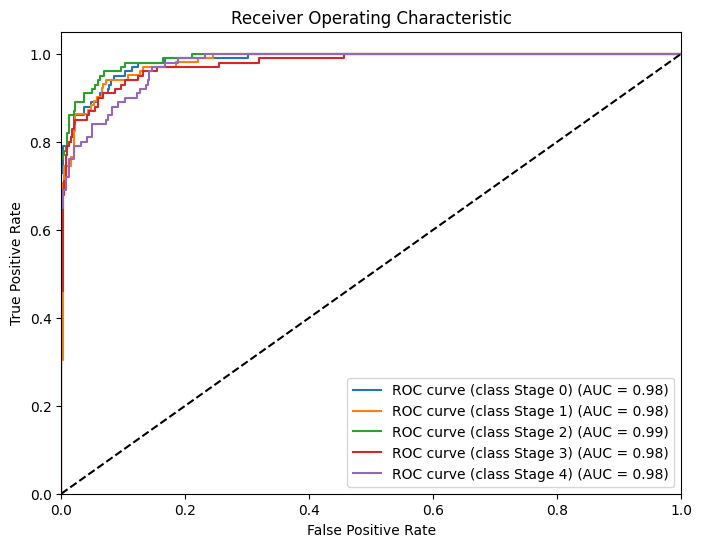

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
y_pred_prob = model.predict(X_val)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(categories)):
    fpr[i], tpr[i], _ = roc_curve((y_val == i).astype(int), y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(categories)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class %s) (AUC = %0.2f)' % (categories[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


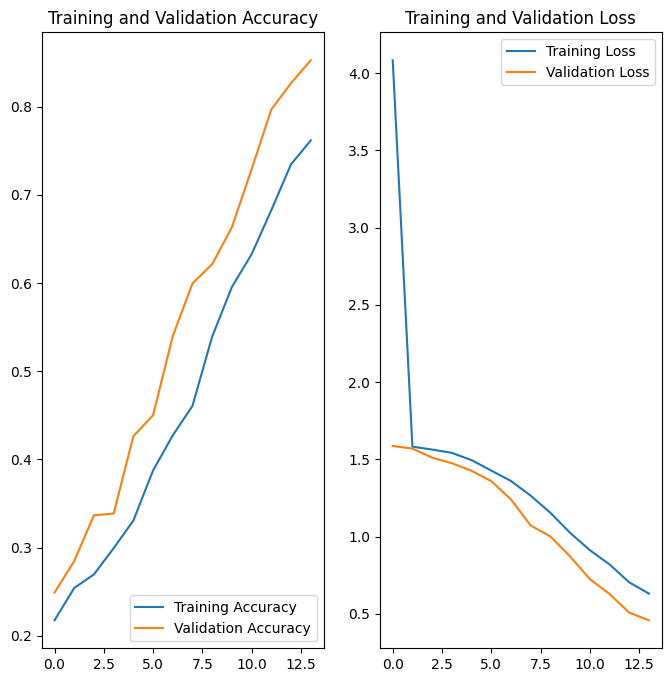

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs_number)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
model.save("efficientnet_b4_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
# Define the number of classes in your dataset
num_classes = 5


In [20]:
  import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Load the data
def load_data(data_type):
    images = []
    labels = []
    for idx, category in enumerate(categories):
        category_path = os.path.join(data_path, data_type, category)
        for img_name in os.listdir(category_path):
            img = cv2.imread(os.path.join(category_path, img_name))
            img = cv2.resize(img, (299, 299))  # Resize to match InceptionV3 input shape
            images.append(img)
            labels.append(idx)
    return np.array(images), np.array(labels)

X_train, y_train = load_data("training")
X_val, y_val = load_data("validation")

# Define the number of classes in your dataset
num_classes = len(categories)

# Load the InceptionV3 model pretrained on ImageNet data
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = Dense(1024, activation='relu')(x)

# Add a logistic layer (softmax) for the number of classes in your dataset
predictions = Dense(num_classes, activation='softmax')(x)

# Combine the base model and top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Train the model
epochs = 10  # You can adjust the number of epochs
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))

# Extract accuracy from history
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Print model summary with accuracy
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)


87910968/87910968 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d_4[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     

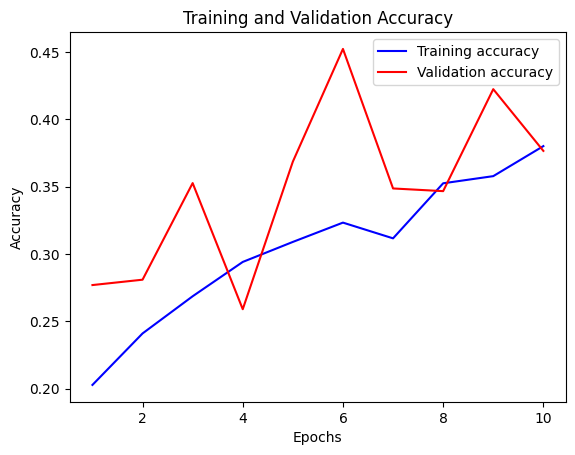

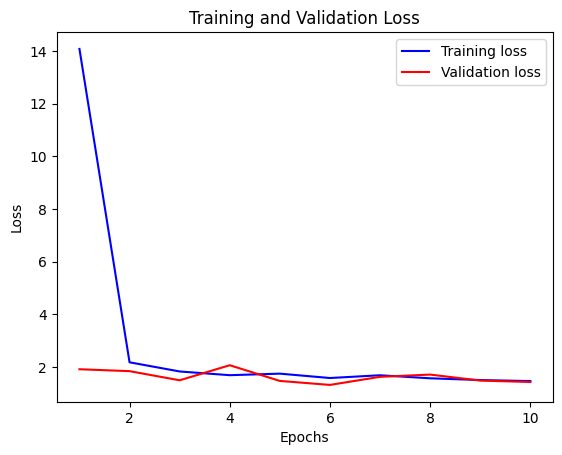

In [21]:
import matplotlib.pyplot as plt

# Get the training and validation accuracy and loss from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


16/16 [==============================] - 4s 112ms/step


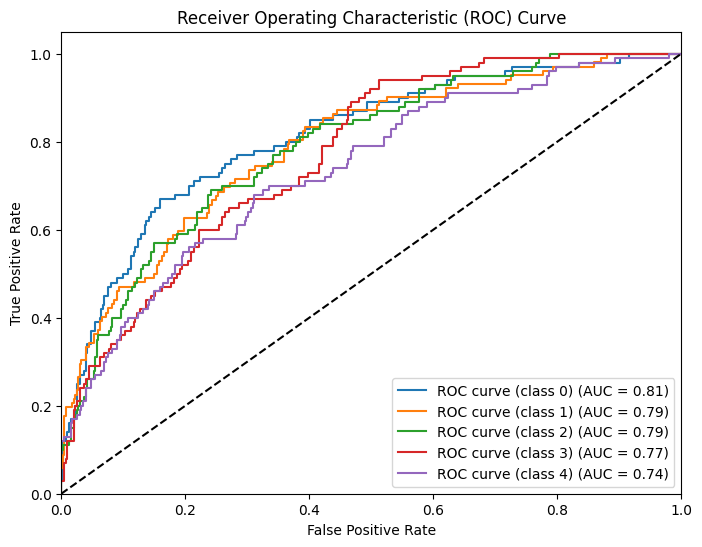

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the model's predictions on the validation data
y_pred = model.predict(X_val)

# Calculate the number of classes
num_classes = len(categories)

# Initialize variables to store fpr, tpr, and auc for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [23]:
y_val_pred = np.argmax(model.predict(X_val), axis=-1)

# Generate classification report
class_names = categories
print(classification_report(y_val, y_val_pred, target_names=class_names))

16/16 [==============================] - 2s 111ms/step
              precision    recall  f1-score   support

     Stage 0       0.80      0.04      0.08       100
     Stage 1       0.32      0.82      0.46       102
     Stage 2       0.46      0.48      0.47       100
     Stage 3       0.55      0.12      0.20       100
     Stage 4       0.38      0.41      0.39       100

    accuracy                           0.38       502
   macro avg       0.50      0.37      0.32       502
weighted avg       0.50      0.38      0.32       502



In [25]:
import tensorflow as tf
import cv2
import numpy as np

# Load the model
model = tf.keras.models.load_model("efficientnet_b4_model.h5")

# Function to preprocess the image
def preprocess_image(image_path):
    # Read the image
    img = cv2.imread(image_path)
    # Check if the image was successfully loaded
    if img is None:
        print("Error: Unable to load image at", image_path)
        return None
    # Resize the image to match the input shape of the model
    img = cv2.resize(img, (128, 128))
    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Convert image to array and normalize pixel values
    img = img.astype(np.float32) / 255.0
    # Expand dimensions to match the input shape of the model
    img = np.expand_dims(img, axis=0)
    return img

# Path to the image you want to test
image_path = r"/content/drive/MyDrive/Datasets/training/Stage 3/780010746.png"
# Preprocess the image
input_image = preprocess_image(image_path)

# Check if the preprocessing was successful
if input_image is not None:
    # Make prediction
    predictions = model.predict(input_image)
    # Get the predicted class
    predicted_class_index = np.argmax(predictions)
    # You may need a mapping from class indices to category names if you have one
    # class_names = [...]  # List of category names
    # predicted_class_name = class_names[predicted_class_index]

    print("Predicted class index:", predicted_class_index)
    # If you have class names mapping, you can print the predicted class name
    # print("Predicted class name:", predicted_class_name)


1/1 [==============================] - 0s 427ms/step
Predicted class index: 2
